# Notebook with data visualization to understand skew in the protected attributes and label on adult data

### Imports

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from load_data import load_data

### Adult data

In [4]:
adult_train_data = load_data('adult', 'train', kind='pd')
adult_valid_data = load_data('adult', 'valid', kind='pd')
adult_test_data = load_data('adult', 'test', kind='pd')

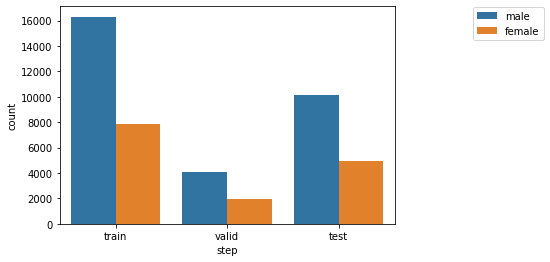

In [84]:
cols = ['sex', 'count', 'step']
steps = ['train', 'valid', 'test']
sex = ['male', 'female']
res_df = pd.DataFrame(columns=cols)

train_counts = adult_train_data['sex'].value_counts()
train_df = pd.DataFrame(
    data=[
        [sex[0], train_counts[0], steps[0]],
        [sex[1], train_counts[1], steps[0]]
    ],
    columns=cols
)

valid_counts = adult_valid_data['sex'].value_counts()
valid_df = pd.DataFrame(
    data=[
        [sex[0], valid_counts[0], steps[1]],
        [sex[1], valid_counts[1], steps[1]]
    ],
    columns=cols
)

test_counts = adult_test_data['sex'].value_counts()
test_df = pd.DataFrame(
    data=[
        [sex[0], test_counts[0], steps[2]],
        [sex[1], test_counts[1], steps[2]]
    ],
    columns=cols
)

res_df = pd.concat([train_df, valid_df, test_df])
sns.barplot(x='step',y='count',data=res_df,hue='sex')
plt.legend(bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.show()


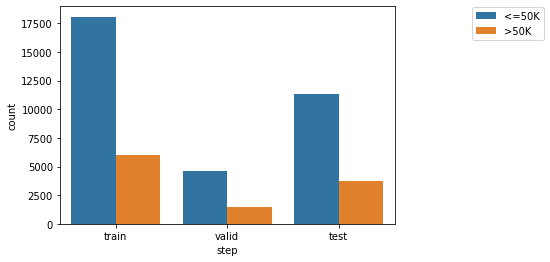

In [83]:
cols = ['income', 'count', 'step']
steps = ['train', 'valid', 'test']
income = ['<=50K', '>50K']
res_df = pd.DataFrame(columns=cols)

train_counts = adult_train_data['income'].value_counts()
train_df = pd.DataFrame(
    data=[
        [income[0], train_counts[0], steps[0]],
        [income[1], train_counts[1], steps[0]]
    ],
    columns=cols
)

valid_counts = adult_valid_data['income'].value_counts()
valid_df = pd.DataFrame(
    data=[
        [income[0], valid_counts[0], steps[1]],
        [income[1], valid_counts[1], steps[1]]
    ],
    columns=cols
)

test_counts = adult_test_data['income'].value_counts()
test_df = pd.DataFrame(
    data=[
        [income[0], test_counts[0], steps[2]],
        [income[1], test_counts[1], steps[2]]
    ],
    columns=cols
)

res_df = pd.concat([train_df, valid_df, test_df])
sns.barplot(x='step',y='count',data=res_df,hue='income')
plt.legend(bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.show()

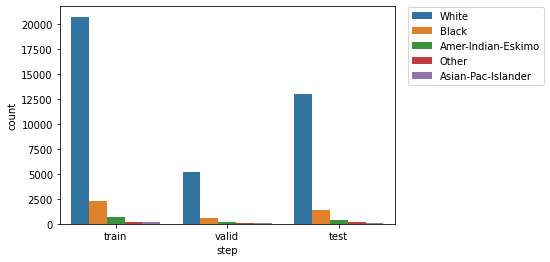

In [82]:
raw_subset = adult_train_data[['race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White']]
subset = pd.get_dummies(raw_subset).idxmax(1).str.replace('race_ ', '')

cols = ['race', 'count', 'step']
steps = ['train', 'valid', 'test']
race = subset.unique()

res_df = pd.DataFrame(columns=cols)

train_counts = subset.value_counts()
train_df = pd.DataFrame(
    data=[
        [race[0], train_counts[0], steps[0]],
        [race[1], train_counts[1], steps[0]],
        [race[2], train_counts[2], steps[0]],
        [race[3], train_counts[3], steps[0]],
        [race[4], train_counts[4], steps[0]]
    ],
    columns=cols
)

raw_subset = adult_valid_data[['race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White']]
subset = pd.get_dummies(raw_subset).idxmax(1).str.replace('race_ ', '')

valid_counts = subset.value_counts()
valid_df = pd.DataFrame(
    data=[
        [race[0], valid_counts[0], steps[1]],
        [race[1], valid_counts[1], steps[1]],
        [race[2], valid_counts[2], steps[1]],
        [race[3], valid_counts[3], steps[1]],
        [race[4], valid_counts[4], steps[1]]
    ],
    columns=cols
)

raw_subset = adult_test_data[['race_ Amer-Indian-Eskimo','race_ Asian-Pac-Islander','race_ Black','race_ Other','race_ White']]
subset = pd.get_dummies(raw_subset).idxmax(1).str.replace('race_ ', '')

test_counts = subset.value_counts()
test_df = pd.DataFrame(
    data=[
        [race[0], test_counts[0], steps[2]],
        [race[1], test_counts[1], steps[2]],
        [race[2], test_counts[2], steps[2]],
        [race[3], test_counts[3], steps[2]],
        [race[4], test_counts[4], steps[2]]
    ],
    columns=cols
)

res_df = pd.concat([train_df, valid_df, test_df])
sns.barplot(x='step',y='count',data=res_df,hue='race')
plt.legend(bbox_to_anchor=(1.46,1.02), loc="upper right")
plt.show()
